In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("house_rental_data.csv.txt")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.shape

(645, 8)

In [4]:
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [5]:
numeric_features = ['Sqft', 'Price', 'Bedroom', 'Bathroom', 'Floor', 'Living.Room','TotalFloor']
cluster_data = data[numeric_features]

cluster_data = cluster_data.dropna()

In [9]:
cluster_data.head()

,Sqft,Price,Bedroom,Bathroom,Floor,Living.Room,TotalFloor
0,1177.698,62000,2,2,2,2,7
1,2134.800,78000,4,2,5,2,7
2,1138.560,58000,2,1,5,2,7
3,1458.780,45000,3,2,2,2,7
4,967.776,45000,3,2,11,2,14


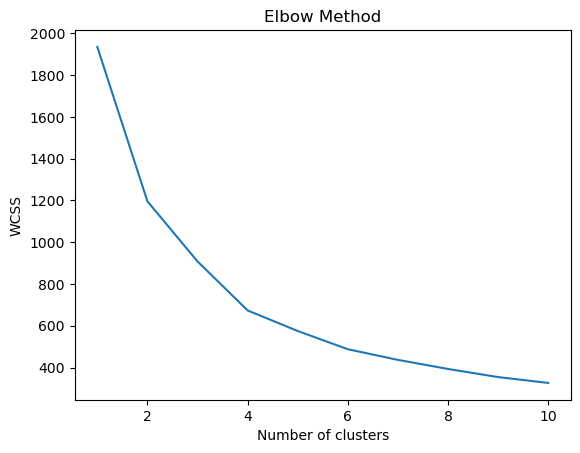

In [10]:
from sklearn.cluster import KMeans

features = data[['Floor', 'Sqft', 'Price']]

from sklearn.preprocessing import StandardScaler
features = StandardScaler().fit_transform(features)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


In [12]:
#choose the optimal value of K
optimal_k = 3 

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(features)

print(data[['Floor', 'Sqft', 'Price', 'cluster']])



     Floor      Sqft  Price  cluster
0        2  1177.698  62000        0
1        5  2134.800  78000        2
2        5  1138.560  58000        0
3        2  1458.780  45000        0
4       11   967.776  45000        0
..     ...       ...    ...      ...
640      7  1359.156  45000        0
641      4   377.148  24800        0
642     13   740.064  45000        0
643      3  1707.840  65000        2
644      6  1376.946  36000        0

[645 rows x 4 columns]


In [13]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(features)

print(data[['Floor', 'Sqft', 'Price', 'cluster']])

     Floor      Sqft  Price  cluster
0        2  1177.698  62000        3
1        5  2134.800  78000        2
2        5  1138.560  58000        3
3        2  1458.780  45000        3
4       11   967.776  45000        0
..     ...       ...    ...      ...
640      7  1359.156  45000        0
641      4   377.148  24800        3
642     13   740.064  45000        0
643      3  1707.840  65000        2
644      6  1376.946  36000        3

[645 rows x 4 columns]


In [14]:
optimal_k = 7

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(features)

print(data[['Floor', 'Sqft', 'Price', 'cluster']])

     Floor      Sqft  Price  cluster
0        2  1177.698  62000        5
1        5  2134.800  78000        6
2        5  1138.560  58000        5
3        2  1458.780  45000        5
4       11   967.776  45000        4
..     ...       ...    ...      ...
640      7  1359.156  45000        4
641      4   377.148  24800        0
642     13   740.064  45000        4
643      3  1707.840  65000        5
644      6  1376.946  36000        5

[645 rows x 4 columns]
